# Analyzing Airport Data - Hope Ugwuoke
In this project I studied the data from all the flights in the US from September 1st to September 30th of 2021. 

The nodes are aiports and the edges are flights. There are about 18,000 edges. The network is weighted because there are several flights (such as 100 or 200) flights between any two airports each month. 

The network is directed because the flight come from an origin and have an end destination. Sometimes the weight becomes balenced because flights may come from an airport and then return to the airport. 

When the weights are balenced the arrow is not visible. Yet there are some arrows in the image because some airports do not reciprocate. As in there are flights from the airport but no flights to the airport.   

The first step was getting the data from the bureau of labor statistics and importing it into a networkx graph. 

In [2]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
with open('Airport data.txt', 'r') as Flightdata:
    originlist = []
    destinationlist = []
    for i, row in enumerate(Flightdata): 
        rowlist = row.split('|')
        originlist.append(rowlist[5])
        destinationlist.append(rowlist[16])

nodelist = np.unique(originlist)
flight_counts = pd.crosstab(originlist, destinationlist,dropna=False)
flight_counts = flight_counts.fillna(0)
for index in flight_counts.index: 
    if index in flight_counts.columns:
        continue
    else:
        flight_counts[index]=np.zeros(435)

## Initial plots of the Data

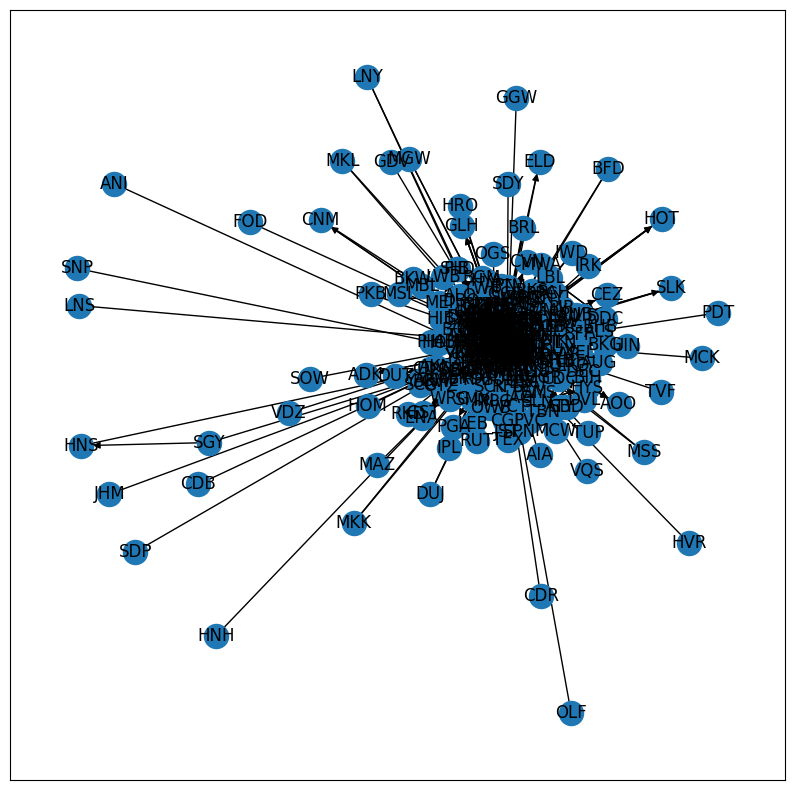

In [6]:
G = nx.from_pandas_adjacency(flight_counts,create_using=nx.DiGraph)
fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G)

<AxesSubplot: >

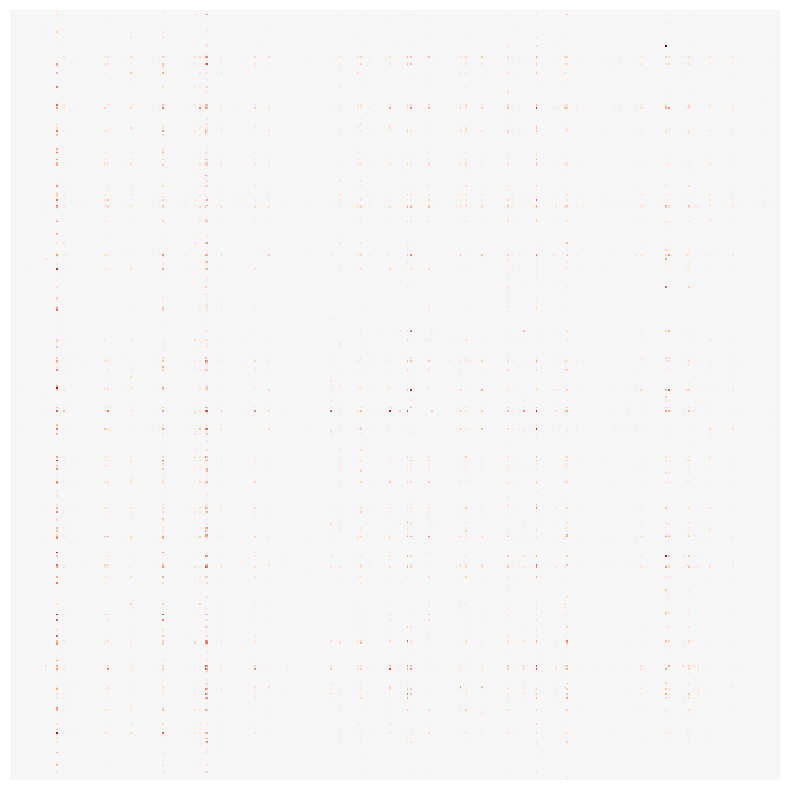

In [10]:
from graspologic.plot import heatmap
adj = nx.to_numpy_array(G, nodelist=nodelist)

heatmap(adj, cbar=False)

Observations: 
- The networkx graph is not very good 
- There are many smaller (less busy) airports that only fly to larger airports. 
- The large or busy airports are the lines that are visible on the graph. 

## Community Detection 
Next I used leiden to detect communites and to create nicer looking plots. 

Depending on resolution there could be anywhere from 3 to 45 communities. No matter the resolution the modularity was low. The modularity score for resolution of 1 was 0.18. 

Graphical representation with 20 communities 
  ![w:900px](./20 communities.png)

Graphical representation with 4 communities 
  ![w:900px](./4 communities.png)

The commonality between these graphs is modularity is low. Modularity scores range between negative and positive 0.1. 

## Centrality Measures
Next I tried the different centrality measures on the data. 
  ![w:900px](./Centrality measures.png)

It's clear that there aren't many clear central airports in the data. Near the center there is some density but it is surrounded by a lot of white dots. This surprised me because I expected there to be a some central airports and a lot of smaller aiports arround it. But there are fewer central airports than I expected. 

  ![w:900px](./embed example.png)
Some airports were very popular, and formed such strong communities that UMAP placed them very far away from the rest of the airports. These are probably cities near a major city so maybe a newark airport near New York City. 